In [1]:
%autosave 0

Autosave disabled


### 0. Dependencies

In [2]:
# linear algebra and data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

# Statistical interference
import scipy.stats
from scipy import stats
from scipy.stats import skewtest
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# Preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Estimators
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Pipelining
from sklearn.pipeline import make_pipeline

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# <center>1. Data Overwiew</center>

25 unlabeled features + target.<br>
Mock dataset for regression exercise.<br><br>
Data source:<br>
URL: https://www.kaggle.com/datasets/juliazubko/25-unlabeled-features-target<br>

#### Redundant variable 'id' is found (Output 1.1).

In [3]:
print('Output 1.1')
df = pd.read_csv('prediktiv_data.csv')
pd.set_option('display.max_columns', 26)
df.sample(12)

Output 1.1


,id,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
2922,2923,188000,2.0,560.0,0,1728.0,1728,8,1728,5,5,1976,2,NaN,NaN,red,0,NaN,bad,4,2,7,2006,0,0,1976
2113,2114,277000,2.0,454.0,0,1157.0,1180,7,2062,7,5,1988,2,NaN,NaN,red,1,good,bad,3,1,4,2007,1,882,1989
498,499,336000,3.0,676.0,0,1225.0,1276,8,2612,8,5,1998,2,NaN,NaN,red,1,bad,good,4,1,7,2009,1,1336,1999
1656,1657,170000,2.0,944.0,0,1625.0,1220,6,1220,6,5,1971,2,NaN,NaN,red,1,bad,bad,2,1,9,2007,0,0,1971
2142,2143,127000,2.0,576.0,0,864.0,864,5,864,5,5,1972,1,NaN,NaN,red,0,NaN,amazing,3,1,9,2007,0,0,2000
1585,1586,305000,3.0,749.0,0,1482.0,1482,10,2262,8,5,2003,2,NaN,NaN,red,2,good,good,4,1,8,2008,1,780,2003
2474,2475,158000,2.0,576.0,0,1158.0,1158,5,1158,6,5,2004,1,NaN,NaN,red,0,NaN,good,3,1,5,2006,1,0,2004
1866,1867,164000,2.0,528.0,0,1295.0,1295,6,1295,6,5,1968,1,NaN,NaN,red,0,NaN,bad,3,1,4,2007,1,0,1968
2074,2075,216000,2.0,576.0,0,409.0,1325,6,1325,5,7,1948,2,NaN,NaN,red,1,bad,good,3,1,7,2007,0,0,2005
62,63,325000,2.0,712.0,0,1463.0,1500,9,2622,8,5,1994,2,NaN,NaN,red,2,bad,good,3,1,4,2010,1,1122,1995


#### 2930 samples, 26 columns, various dtypes. Also, NaNs are present in the data (Output 1.2).

In [4]:
print('Output 1.2')
df.info()

Output 1.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2930 non-null   int64  
 1   target       2930 non-null   int64  
 2   feature01    2929 non-null   float64
 3   feature02    2929 non-null   float64
 4   feature03    2930 non-null   int64  
 5   feature04    2929 non-null   float64
 6   feature05    2930 non-null   int64  
 7   feature06    2930 non-null   int64  
 8   feature07    2930 non-null   int64  
 9   feature08    2930 non-null   int64  
 10  feature09    2930 non-null   int64  
 11  feature10    2930 non-null   int64  
 12  feature10.1  2930 non-null   int64  
 13  feature11    198 non-null    object 
 14  feature12    572 non-null    object 
 15  feature13    2929 non-null   object 
 16  feature14    2930 non-null   int64  
 17  feature15    1508 non-null   object 
 18  feature16    2930 non-null   object 


#### Variables' number of unique values is shown in (Output 1.3).

In [5]:
print('Output 1.3\n')
for col in df.columns:
    print(col, df[col].dtype, len(df[col].unique()))

Output 1.3

id int64 2930
target int64 1032
feature01 float64 7
feature02 float64 604
feature03 int64 14
feature04 float64 1059
feature05 int64 1083
feature06 int64 14
feature07 int64 1292
feature08 int64 10
feature09 int64 9
feature10 int64 118
feature10.1 int64 5
feature11 object 3
feature12 object 5
feature13 object 6
feature14 int64 5
feature15 object 6
feature16 object 5
feature17 int64 8
feature18 int64 4
feature19 int64 12
feature20 int64 5
feature21 int64 3
feature22 int64 635
feature23 int64 61


### <center>Continuous features overwiew</center>

#### Numeric feature will be assumed continuous if number of unique values of a feature is greater or equal than 60 (Output 1.4).

In [6]:
print('Output 1.4\n')
continuous_features = []
for col in df.columns:
    if (col == 'id') | (col == 'target'):
        continue
    if (len(df[col].unique()) >= 60):
        continuous_features.append(col)
for col in continuous_features:
    print(col)
    print('dtype: {}'.format(df[col].dtype))
    print('number of unique values: {}'.format(len(df[col].unique())))
    print('number od NaNs: {}\n'.format(df[col].isnull().sum()))

Output 1.4

feature02
dtype: float64
number of unique values: 604
number od NaNs: 1

feature04
dtype: float64
number of unique values: 1059
number od NaNs: 1

feature05
dtype: int64
number of unique values: 1083
number od NaNs: 0

feature07
dtype: int64
number of unique values: 1292
number od NaNs: 0

feature10
dtype: int64
number of unique values: 118
number od NaNs: 0

feature22
dtype: int64
number of unique values: 635
number od NaNs: 0

feature23
dtype: int64
number of unique values: 61
number od NaNs: 0



### <center>Ordinal features overwiew</center>

#### Numeric feature will be assumed ordinal if number of unique values of a feature is smaller than 60 (Output 1.5).

In [7]:
print('Output 1.5\n')
ordinal_features = []
for col in df.columns:
    if (len(df[col].unique()) < 60) & (df[col].dtype != object):
        ordinal_features.append(col)
for col in ordinal_features:
    print(col)
    print('dtype: {}'.format(df[col].dtype))
    print('number of unique values: {}'.format(len(df[col].unique())))
    print('number od NaNs: {}\n'.format(df[col].isnull().sum()))

Output 1.5

feature01
dtype: float64
number of unique values: 7
number od NaNs: 1

feature03
dtype: int64
number of unique values: 14
number od NaNs: 0

feature06
dtype: int64
number of unique values: 14
number od NaNs: 0

feature08
dtype: int64
number of unique values: 10
number od NaNs: 0

feature09
dtype: int64
number of unique values: 9
number od NaNs: 0

feature10.1
dtype: int64
number of unique values: 5
number od NaNs: 0

feature14
dtype: int64
number of unique values: 5
number od NaNs: 0

feature17
dtype: int64
number of unique values: 8
number od NaNs: 0

feature18
dtype: int64
number of unique values: 4
number od NaNs: 0

feature19
dtype: int64
number of unique values: 12
number od NaNs: 0

feature20
dtype: int64
number of unique values: 5
number od NaNs: 0

feature21
dtype: int64
number of unique values: 3
number od NaNs: 0



### <center>Nominal features overwiew</center>

In [8]:
print('Output 1.6')
print('Nominal features\n')
nominal_features = []
for col in df.columns:
    if (df[col].dtype == object):
        nominal_features.append(col)
for col in nominal_features:
    print(col)
    print('dtype: {}'.format(df[col].dtype))
    print('number of unique values: {}'.format(len(df[col].unique())))
    print('number od NaNs: {}\n'.format(df[col].isnull().sum()))

Output 1.6
Nominal features

feature11
dtype: object
number of unique values: 3
number od NaNs: 2732

feature12
dtype: object
number of unique values: 5
number od NaNs: 2358

feature13
dtype: object
number of unique values: 6
number od NaNs: 1

feature15
dtype: object
number of unique values: 6
number od NaNs: 1422

feature16
dtype: object
number of unique values: 5
number od NaNs: 0



### <center>Target variable overwiew</center>

#### Target distribution and descriptive statistics are given in (Output 1.7).

Output 1.7


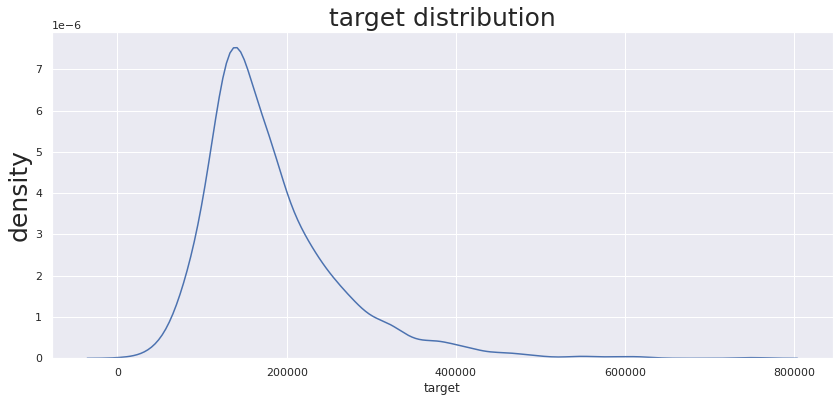

target (mean, std): (180796.0600682594, 79886.69235666493)
target quartiles (min, 25%, 50%, 75%, max): (12789.0, 129500.0, 160000.0, 213500.0, 755000.0)
target SkewtestResult(statistic=27.213074914765407, pvalue=4.5485671773427874e-163)


In [9]:
print('Output 1.7')
plt.figure(figsize=(14, 6))
sns.kdeplot(x=df['target'])
plt.title('target distribution', size=25)
plt.ylabel('density', size=25)
plt.show()
print('target (mean, std): ({}, {})'.format(df.target.describe()[1], df.target.describe()[2]))
print('target quartiles (min, 25%, 50%, 75%, max): ({}, {}, {}, {}, {})'.format( 
                                  df.target.describe()[3], 
                                  df.target.describe()[4], 
                                  df.target.describe()[5], 
                                  df.target.describe()[6], 
                                  df.target.describe()[7]))
print('target {}'.format(skewtest(df['target'])))

# <center>2. Data Cleaning</center>

This section contains procedures that needs to be executed on both, training and testing samples. Last subsection splits the data.

### <center>Duplicates</center>

In [10]:
print('Output 2.1')
print('No. of duplicates excluded:')
df.drop('id', axis=1, inplace=True)
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

Output 2.1
No. of duplicates excluded:
3


### <center>NaNs treatment</center>

#### Regarding NaN issues, two cases are present in data. Either a feature has single NaN or a feature suffers form overpresence of NaNs (nominal features, 3 cases). Different approaches are therefore employed.

#### In the first case, resoultion is straightforward - rows are dropped (Output 2.2).

In [11]:
# Output 2.2
for col in df.columns:
    if (df[col].isnull().sum() == 1):
        df.drop(df.loc[pd.isna(df[col])].index, inplace=True)

#### In case od NaNs overpresence, involved features are nominal and NaNs are treated as a category of its own. Adopted label is 'NA' (Output 2.3).

In [12]:
# Output 2.3
df.replace(np.nan, 'NA', inplace=True)

### <center>Dtypes conversion</center>

In [13]:
# Output 2.4
numeric_features = continuous_features + ordinal_features
for col in numeric_features:
    df[col] = df[col].astype(float)
df.target = df.target.astype(float)

## <center>2.1 Further data cleaning (categorical features)</center>

Asking estimator to differentiate based on 12 instances of 'frog' values for feature12 might not be entirely sensible (Output 2.5). Insufficient sample representation issues within features' unique values are resolved here. Some features are discovered to be invariant and therefore excluded.<br><br>This subsection considers only features classified here as ordinal or nominal.

In [14]:
print('Output 2.5')
df['feature12'].value_counts()

Output 2.5


NA      2354
dog      328
cat      118
cow      112
frog      12
Name: feature12, dtype: int64

### <center>2.1.1 Ordinal features</center>

#### List of ordinal features is indicated by (Output 2.6). Next, features are examined.

In [15]:
print('Output 2.6')
print(ordinal_features)

Output 2.6
['feature01', 'feature03', 'feature06', 'feature08', 'feature09', 'feature10.1', 'feature14', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21']


##### feature01

In [16]:
df['feature01'].value_counts()

2.0    1602
1.0     777
3.0     374
0.0     156
4.0      14
5.0       1
Name: feature01, dtype: int64

In [17]:
df.drop(df.loc[(df['feature01']>3)].index, inplace=True)

##### feature03

In [18]:
df['feature03'].value_counts()

0.0      2897
228.0       1
800.0       1
368.0       1
648.0       1
512.0       1
144.0       1
576.0       1
480.0       1
519.0       1
738.0       1
555.0       1
444.0       1
Name: feature03, dtype: int64

In [19]:
ordinal_features.remove('feature03')
numeric_features.remove('feature03')

##### feature06

In [20]:
df['feature06'].value_counts()

6.0     843
7.0     646
5.0     583
8.0     337
4.0     202
9.0     142
10.0     79
11.0     32
3.0      26
12.0     15
15.0      1
13.0      1
2.0       1
14.0      1
Name: feature06, dtype: int64

In [21]:
df.drop(df.loc[(df['feature06']<4)].index, inplace=True)
df.drop(df.loc[(df['feature06']>10)].index, inplace=True)

##### feature08

In [22]:
df['feature08'].value_counts()

5.0     804
6.0     716
7.0     587
8.0     342
4.0     212
9.0      95
3.0      38
10.0     25
2.0      10
1.0       3
Name: feature08, dtype: int64

In [23]:
df.drop(df.loc[(df['feature08']<4)].index, inplace=True)
df.drop(df.loc[(df['feature08']>9)].index, inplace=True)

##### feature09

In [24]:
df['feature09'].value_counts()

5.0    1560
6.0     513
7.0     378
8.0     140
4.0      85
9.0      36
3.0      35
2.0       6
1.0       3
Name: feature09, dtype: int64

In [25]:
df.drop(df.loc[(df['feature09']<4)].index, inplace=True)
df.drop(df.loc[(df['feature09']>8)].index, inplace=True)

##### feature10.1

In [26]:
df['feature10.1'].value_counts()

2.0    1432
1.0    1200
3.0      36
0.0       8
Name: feature10.1, dtype: int64

In [27]:
df.drop(df.loc[(df['feature10.1']==3)].index, inplace=True)
df.drop(df.loc[(df['feature10.1']==0)].index, inplace=True)
df['feature10.1'] = df['feature10.1'].apply(lambda x: 0 if x==2 else 1)

##### feature14

In [28]:
df['feature14'].value_counts()

0.0    1265
1.0    1177
2.0     179
3.0      10
4.0       1
Name: feature14, dtype: int64

In [29]:
df.drop(df.loc[(df['feature14']>2)].index, inplace=True)

##### feature17

In [30]:
df['feature17'].value_counts()

3.0    1503
2.0     671
4.0     329
1.0      78
5.0      26
6.0      13
0.0       1
Name: feature17, dtype: int64

In [31]:
df.drop(df.loc[(df['feature17']==0)].index, inplace=True)
df.drop(df.loc[(df['feature17']>4)].index, inplace=True)

##### feature18

In [32]:
df['feature18'].value_counts()

1.0    2505
2.0      72
0.0       3
3.0       1
Name: feature18, dtype: int64

In [33]:
ordinal_features.remove('feature18')
numeric_features.remove('feature18')

##### feature19

In [34]:
df['feature19'].value_counts()

6.0     454
7.0     399
5.0     350
4.0     253
3.0     206
8.0     202
10.0    150
9.0     137
2.0     122
11.0    116
1.0     102
12.0     90
Name: feature19, dtype: int64

##### feature20

In [35]:
df['feature20'].value_counts()

2007.0    618
2009.0    564
2008.0    549
2006.0    548
2010.0    302
Name: feature20, dtype: int64

##### feature21

In [36]:
df['feature21'].value_counts()

0.0    1624
1.0     946
2.0      11
Name: feature21, dtype: int64

In [37]:
df.drop(df.loc[(df['feature21']==2)].index, inplace=True)

### <center>2.1.2 Nominal features</center>

#### List of nominal features is given by (Output 2.7). Next, features are examined.

In [38]:
print('Output 2.7')
print(nominal_features)

Output 2.7
['feature11', 'feature12', 'feature13', 'feature15', 'feature16']


##### feature11

In [39]:
df['feature11'].value_counts()

NA      2407
Grvl      92
Pave      71
Name: feature11, dtype: int64

In [40]:
df.loc[df['feature11']=='Grvl', 'target'].mean()

124860.36956521739

In [41]:
df.loc[df['feature11']=='Pave', 'target'].mean(), df.loc[df['feature11']=='Pave', 'target'].std()

(172413.50704225354, 39977.00838012957)

In [42]:
df.loc[df['feature11']=='NA', 'target'].mean(), df.loc[df['feature11']=='NA', 'target'].std()

(180616.9925218114, 69618.68239484269)

##### feature12

In [43]:
df['feature12'].value_counts()

NA      2053
dog      300
cat      104
cow      101
frog      12
Name: feature12, dtype: int64

In [44]:
df.drop(df.loc[(df['feature12']=='frog')].index, inplace=True)

Well, unfortunately, twelve frogs went missing.

##### feature13

In [45]:
df['feature13'].value_counts()

red       2368
blue       147
green       37
yellow       6
Name: feature13, dtype: int64

In [46]:
df.drop(df.loc[(df['feature13']=='green')].index, inplace=True)
df.drop(df.loc[(df['feature13']=='yellow')].index, inplace=True)

##### feature15

In [47]:
df['feature15'].value_counts()

NA          1191
good         636
bad          543
okay          72
horrible      43
amazing       30
Name: feature15, dtype: int64

In [48]:
df['feature15'] = df['feature15'].apply(lambda x: 'good' if x=='amazing' else x)
df['feature15'] = df['feature15'].apply(lambda x: 'bad' if x=='horrible' else x)

##### feature16

In [49]:
df['feature16'].value_counts()

bad        1273
good       1061
amazing     142
okay         39
Name: feature16, dtype: int64

In [50]:
df.drop(df.loc[(df['feature16']=='okay')].index, inplace=True)

## <center>2.2 Train/test sample split</center>

Since in next section statistical interference occurs, independent testing sample is now created (Output 2.8).

In [51]:
# Output 2.8
y = df['target']
X = df.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
df = pd.concat([X_train, y_train], axis=1)

# <center>3. Features' statistical significance</center>

Here, statistical interference is conducted in order to filter out irrelevant features.

### <center>Numeric features</center>

#### Two numeric features are found insignificant (Output 3.1).

In [52]:
print('Output 3.1\n')
# statistical interference (Spearman corr coefficient)
spearman_list = []
for col in numeric_features:
    if (scipy.stats.spearmanr(df[['target', col]]).pvalue < 0.05):
        spearman_list.append(col)

print('*Statistically significant numeric variables (Spearman corr):')
print(spearman_list)

# statistical interference (Pearson corr coefficient)
pearson_list = []
for col in numeric_features:
    if (scipy.stats.pearsonr(df['target'], df[col])[1] < 0.05):
        pearson_list.append(col)

print('\n*Statistically significant numeric variables (Pearson corr):')
print(pearson_list)

# statistical interference (Kendall corr coefficient)
kendall_list = []
for col in numeric_features:
    tau, p_value = stats.kendalltau(df['target'], df[col])
    if (p_value < 0.05):
        kendall_list.append(col)       

print('\n*Statistically significant numeric variables (Kendall corr):')
print(kendall_list)

siginificant_features = set(spearman_list + pearson_list + kendall_list)

print('\nSIGNIFICANT NUMERIC FEATURES:')
prev_length = len(numeric_features)
numeric_features = []
for col in df.columns:
    if col == 'target':
        continue
    for var in siginificant_features:
        if col == var:
            numeric_features.append(col)
print(numeric_features)
print('Number of features trashed: {}'.format(prev_length-len(numeric_features)))

Output 3.1

*Statistically significant numeric variables (Spearman corr):
['feature02', 'feature04', 'feature05', 'feature07', 'feature10', 'feature22', 'feature23', 'feature01', 'feature06', 'feature08', 'feature09', 'feature10.1', 'feature14', 'feature17', 'feature21']

*Statistically significant numeric variables (Pearson corr):
['feature02', 'feature04', 'feature05', 'feature07', 'feature10', 'feature22', 'feature23', 'feature01', 'feature06', 'feature08', 'feature09', 'feature10.1', 'feature14', 'feature17', 'feature21']

*Statistically significant numeric variables (Kendall corr):
['feature02', 'feature04', 'feature05', 'feature07', 'feature10', 'feature22', 'feature23', 'feature01', 'feature06', 'feature08', 'feature09', 'feature10.1', 'feature14', 'feature17', 'feature21']

SIGNIFICANT NUMERIC FEATURES:
['feature01', 'feature02', 'feature04', 'feature05', 'feature06', 'feature07', 'feature08', 'feature09', 'feature10', 'feature10.1', 'feature14', 'feature17', 'feature21', 'feat

### <center>Nominal features</center>

#### All nominal features are found to be relevant.

In [53]:
# feature11 is significant (pvalue < 0.05)
stats.kruskal(df.loc[df['feature11']=='NA', 'target'],
              df.loc[df['feature11']=='Grvl', 'target'],
              df.loc[df['feature11']=='Pave', 'target'])

KruskalResult(statistic=63.06500113090776, pvalue=2.021198670105703e-14)

In [54]:
# feature12 is significant (pvalue < 0.05)
stats.kruskal(df.loc[df['feature12']=='NA', 'target'],
              df.loc[df['feature12']=='cat', 'target'],
              df.loc[df['feature12']=='dog', 'target'],
              df.loc[df['feature12']=='cow', 'target'])

KruskalResult(statistic=118.36947567599536, pvalue=1.7321218510762005e-25)

In [55]:
# feature13 is significant (pvalue < 0.05)
stats.kruskal(df.loc[df['feature13']=='red', 'target'],
              df.loc[df['feature13']=='blue', 'target'])

KruskalResult(statistic=77.12858023017225, pvalue=1.6018248264934129e-18)

In [56]:
# feature15 is significant (pvalue < 0.05)
stats.kruskal(df.loc[df['feature15']=='NA', 'target'],
              df.loc[df['feature15']=='bad', 'target'],
              df.loc[df['feature15']=='good', 'target'],
              df.loc[df['feature15']=='okay', 'target'])

KruskalResult(statistic=519.5456191956421, pvalue=2.7713262810152423e-112)

In [57]:
# feature16 is significant (pvalue < 0.05)
stats.kruskal(df.loc[df['feature16']=='bad', 'target'],
              df.loc[df['feature16']=='good', 'target'],
              df.loc[df['feature16']=='amazing', 'target'])

KruskalResult(statistic=835.7486809454592, pvalue=3.3073473133813146e-182)

# <center>4. Distributions</center>

### <center>Continuous variables</center>

#### Wealth of information regarding continious features distributions is shown by (Output 4.1).

Output 4.1

*************************************************************************************************************


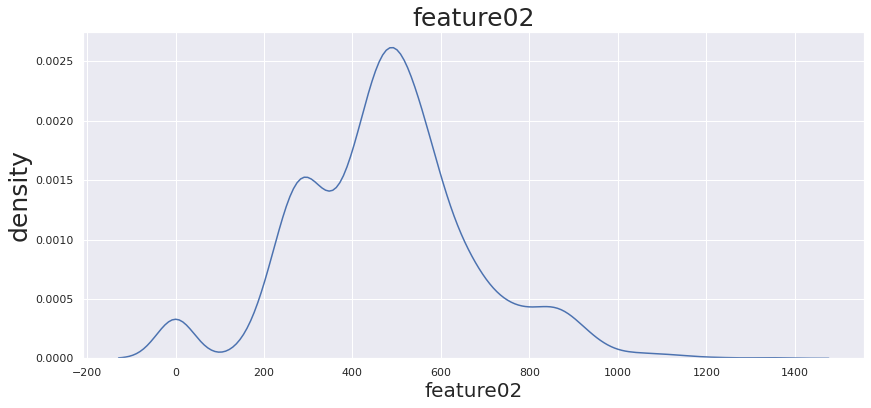

feature02 (mean, std): (477.2328282828283, 196.01416308637093)
feature02 quartiles (min, 25%, 50%, 75%, max): (0.0, 344.75, 480.0, 576.0, 1348.0)
feature02 SkewtestResult(statistic=3.629428310726338, pvalue=0.0002840496011367228)


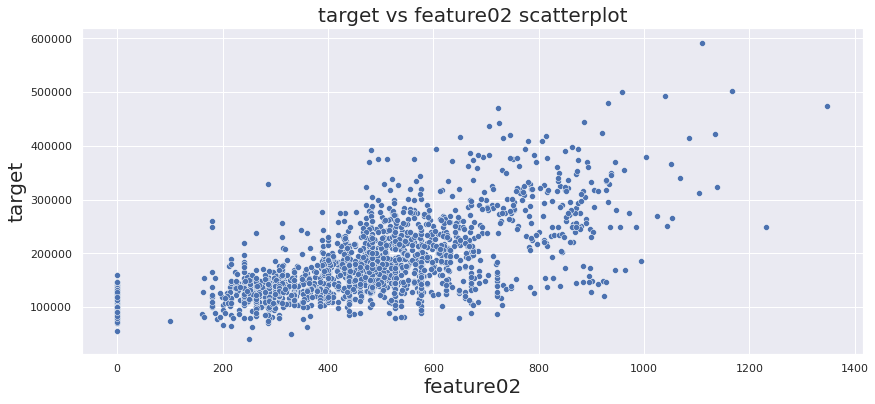


*************************************************************************************************************


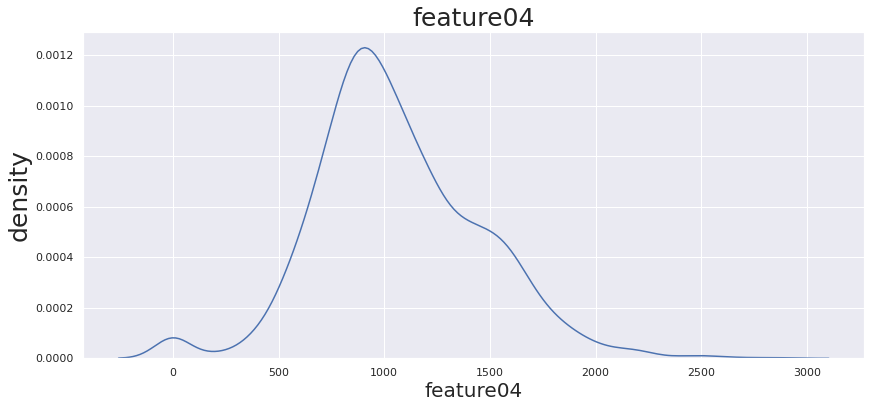

feature04 (mean, std): (1062.4267676767677, 390.865217410763)
feature04 quartiles (min, 25%, 50%, 75%, max): (0.0, 816.0, 1008.0, 1304.0, 2846.0)
feature04 SkewtestResult(statistic=6.184268895063287, pvalue=6.239094119383022e-10)


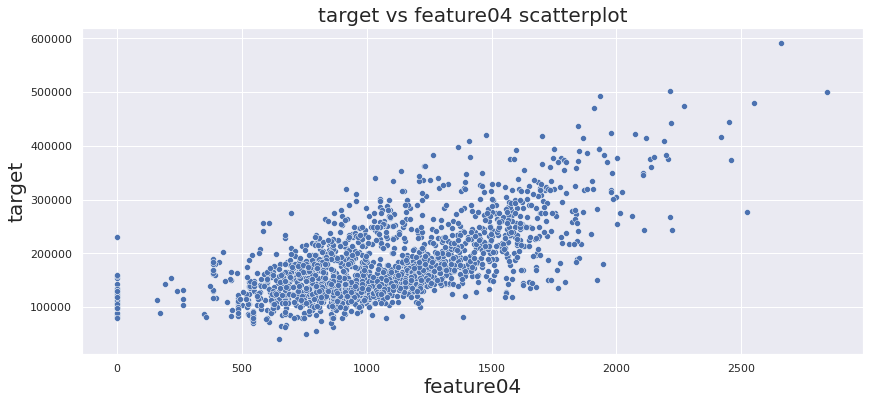


*************************************************************************************************************


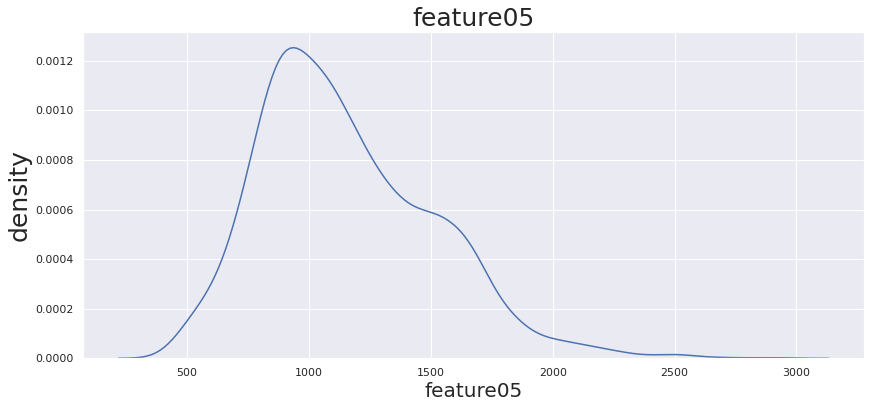

feature05 (mean, std): (1153.9585858585858, 356.6033082520571)
feature05 quartiles (min, 25%, 50%, 75%, max): (453.0, 892.0, 1088.5, 1382.0, 2898.0)
feature05 SkewtestResult(statistic=12.393322059240777, pvalue=2.8402877030327363e-35)


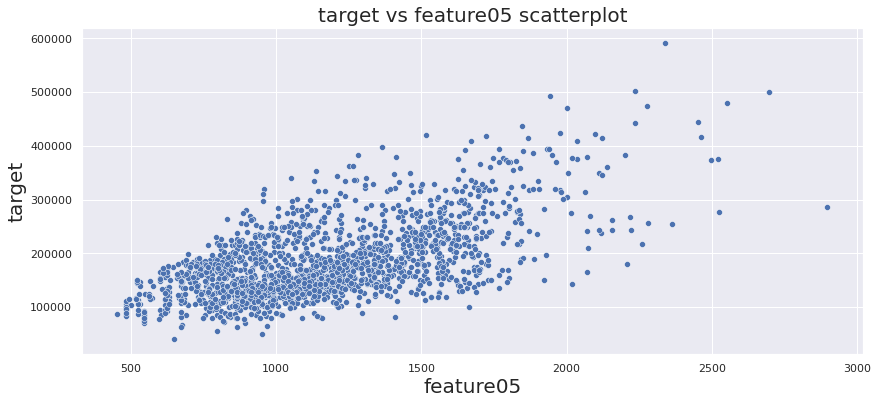


*************************************************************************************************************


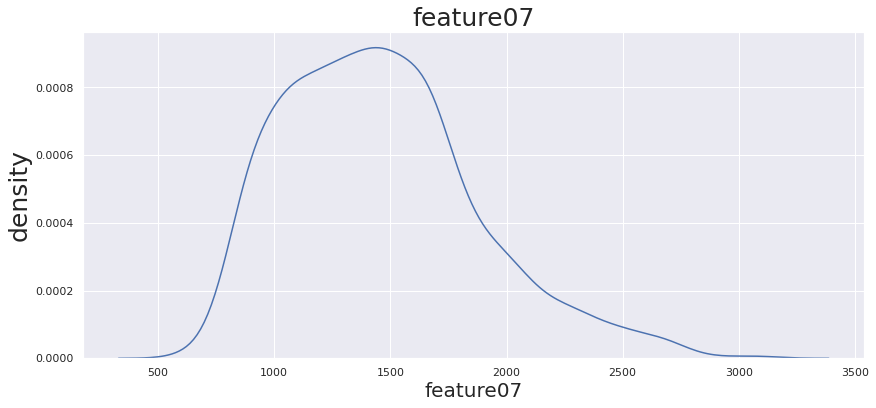

feature07 (mean, std): (1458.6909090909091, 419.04554729843363)
feature07 quartiles (min, 25%, 50%, 75%, max): (605.0, 1133.0, 1425.5, 1694.0, 3112.0)
feature07 SkewtestResult(statistic=11.657066892203442, pvalue=2.1119281406802805e-31)


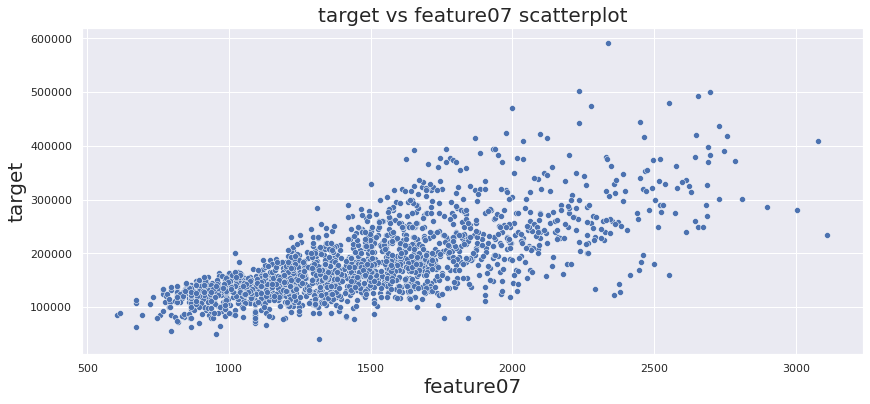


*************************************************************************************************************


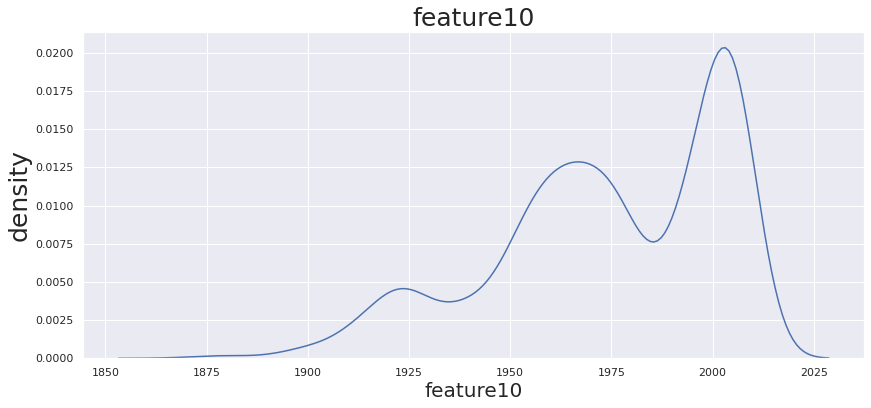

feature10 (mean, std): (1974.2808080808081, 28.47560297844253)
feature10 quartiles (min, 25%, 50%, 75%, max): (1872.0, 1957.0, 1976.0, 2001.25, 2010.0)
feature10 SkewtestResult(statistic=-11.536524845291806, pvalue=8.634348297589904e-31)


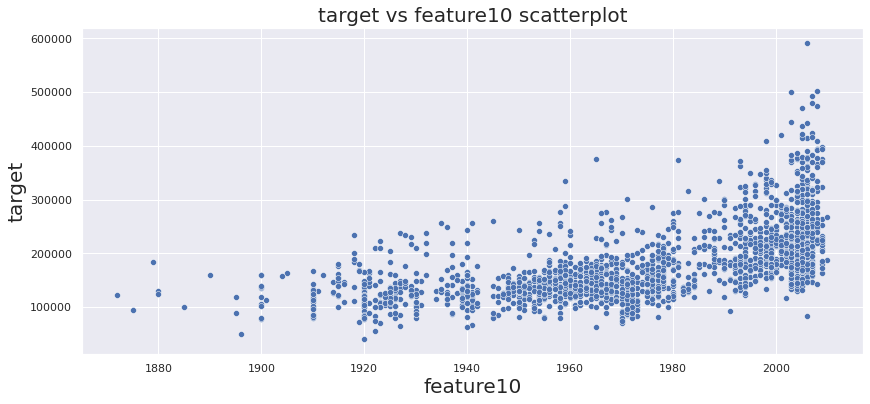


*************************************************************************************************************


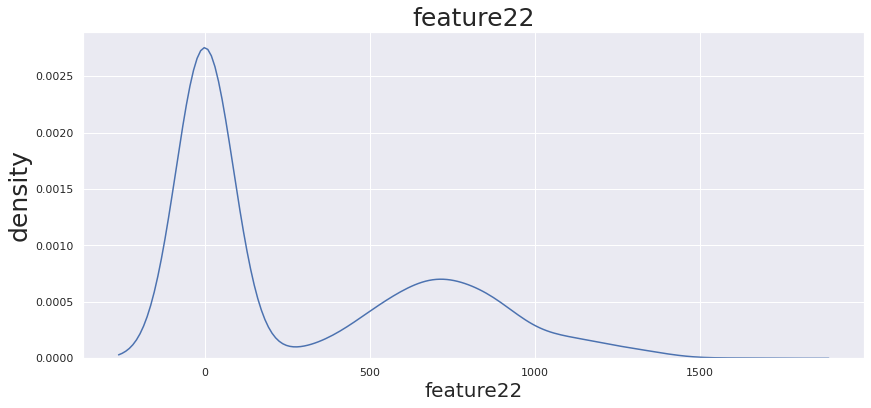

feature22 (mean, std): (301.02474747474747, 396.3286656443178)
feature22 quartiles (min, 25%, 50%, 75%, max): (0.0, 0.0, 0.0, 672.0, 1629.0)
feature22 SkewtestResult(statistic=13.234109303293422, pvalue=5.575376989283985e-40)


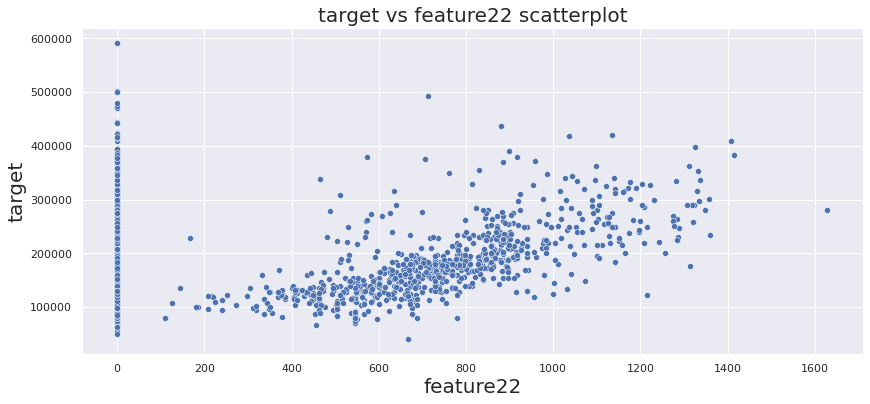


*************************************************************************************************************


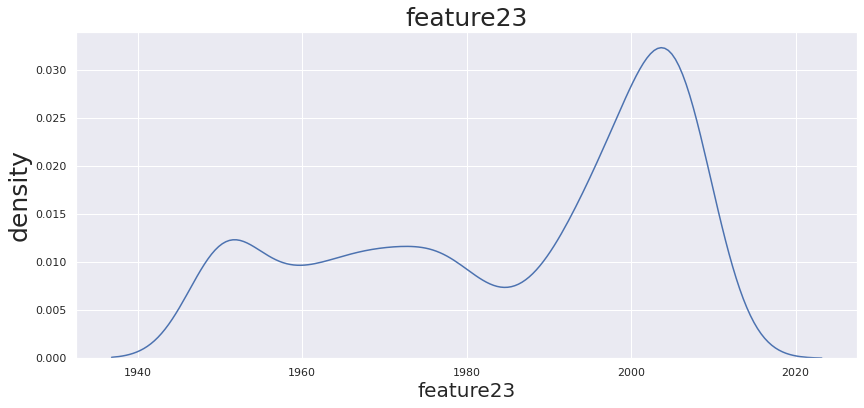

feature23 (mean, std): (1985.4085858585859, 20.045078733324242)
feature23 quartiles (min, 25%, 50%, 75%, max): (1950.0, 1968.0, 1994.0, 2004.0, 2010.0)
feature23 SkewtestResult(statistic=-8.997601557266393, pvalue=2.307023722632617e-19)


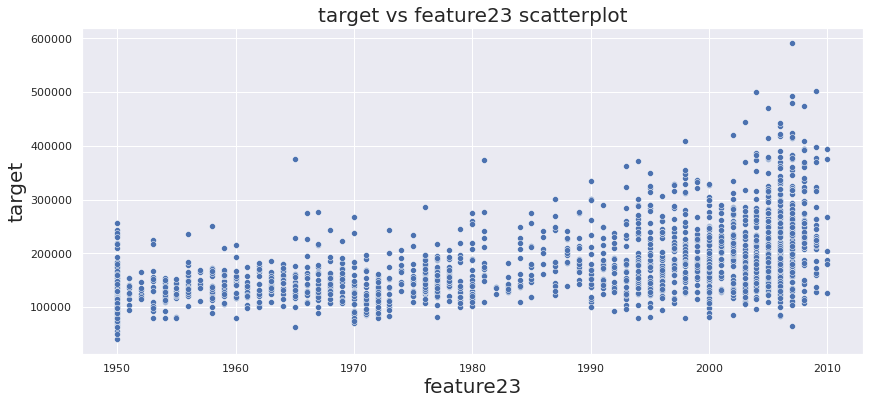

In [58]:
print('Output 4.1')
continuous_features = []
for feature in numeric_features:
    if (len(df[feature].unique()) >= 20):
        continuous_features.append(feature)
for feature in continuous_features:
    print('\n*************************************************************************************************************')
    plt.figure(figsize=(14, 6))
    sns.kdeplot(x=df[feature])
    plt.title('{}'.format(feature), size=25)
    plt.ylabel('density', size=25)
    plt.xlabel(feature, size=20)
    plt.show()
    print('{} (mean, std): ({}, {})'.format(feature, df[feature].describe()[1], df[feature].describe()[2]))
    print('{} quartiles (min, 25%, 50%, 75%, max): ({}, {}, {}, {}, {})'.format(
                                  feature, 
                                  df[feature].describe()[3], 
                                  df[feature].describe()[4], 
                                  df[feature].describe()[5], 
                                  df[feature].describe()[6], 
                                  df[feature].describe()[7]))
    print('{} {}'.format(feature, skewtest(df[feature])))
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x=df[feature], y=df['target'])
    plt.title('target vs {} scatterplot'.format(feature), size=20)
    plt.ylabel('target', size=20)
    plt.xlabel(feature, size=20)
    plt.show()

### <center>Categorical features</center>

#### Categorical features' distributions are plotted (Output 4.2). 

Output 4.2

*************************************************************************************************************


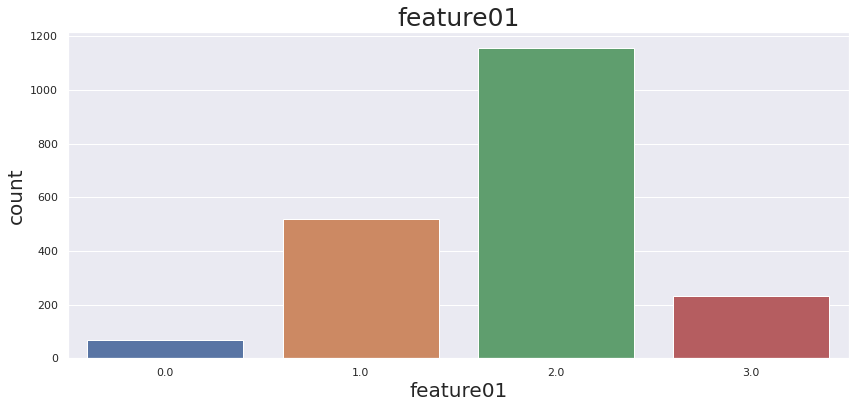

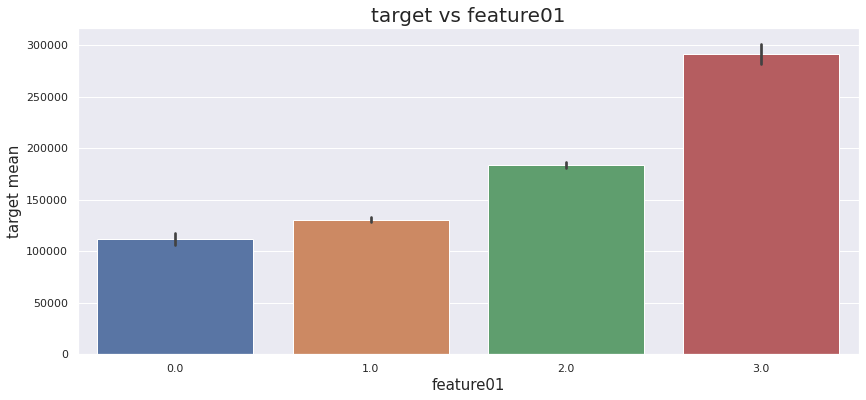

target (mean, std): (target, 179937.24747474748)
target quartiles (min, 25%, 50%, 75%, max): (40000.0, 132500.0, 163000.0, 213000.0, 591587.0)

*************************************************************************************************************


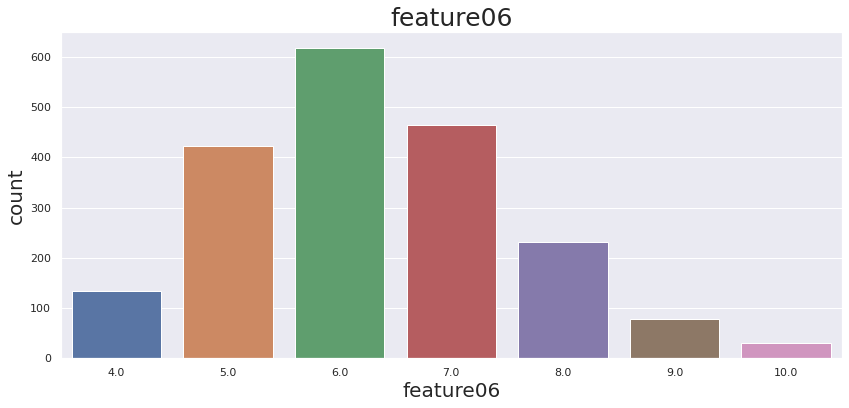

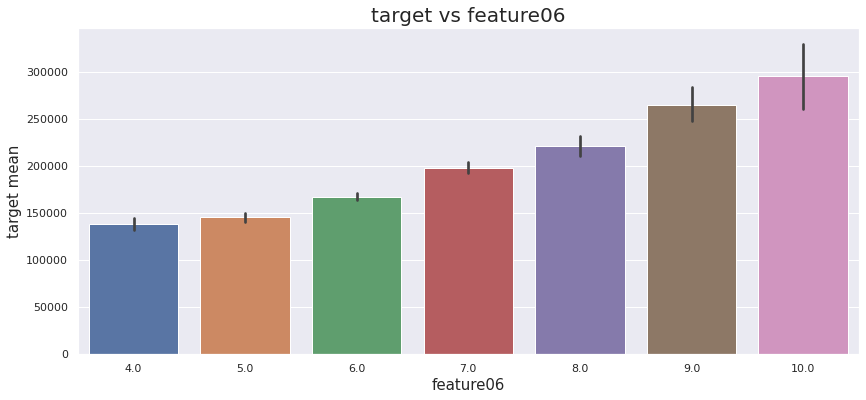

target (mean, std): (target, 179937.24747474748)
target quartiles (min, 25%, 50%, 75%, max): (40000.0, 132500.0, 163000.0, 213000.0, 591587.0)

*************************************************************************************************************


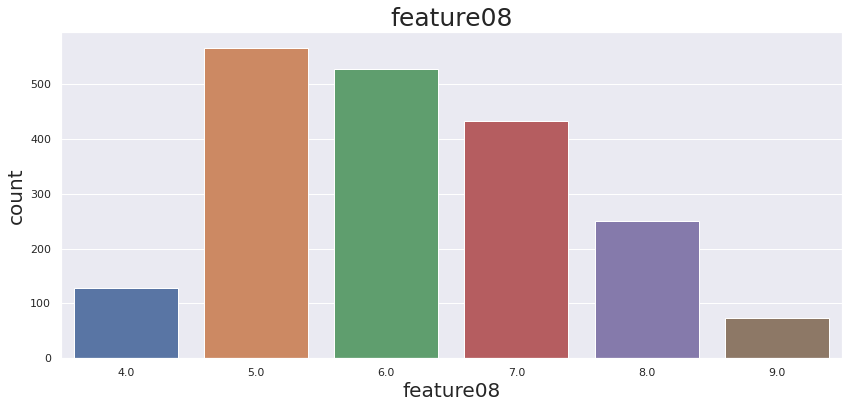

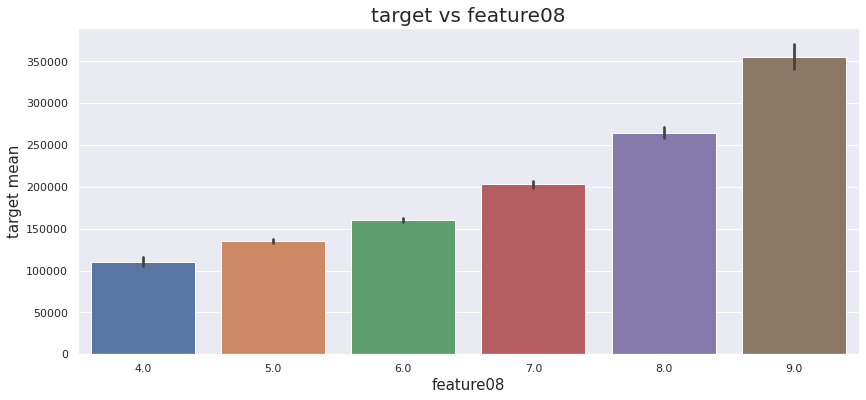

target (mean, std): (target, 179937.24747474748)
target quartiles (min, 25%, 50%, 75%, max): (40000.0, 132500.0, 163000.0, 213000.0, 591587.0)

*************************************************************************************************************


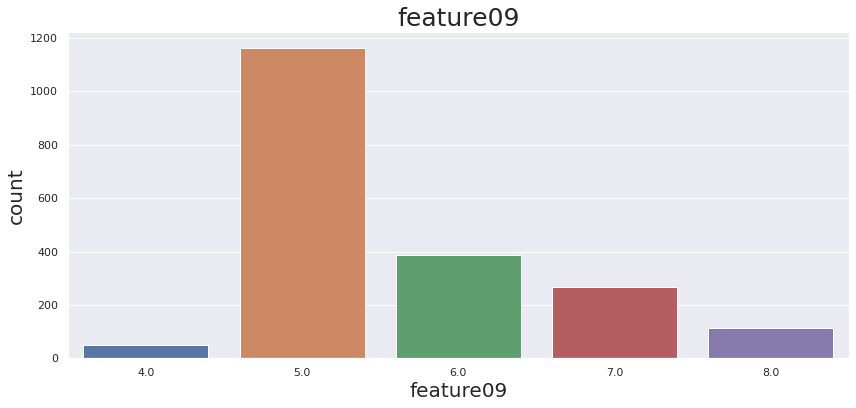

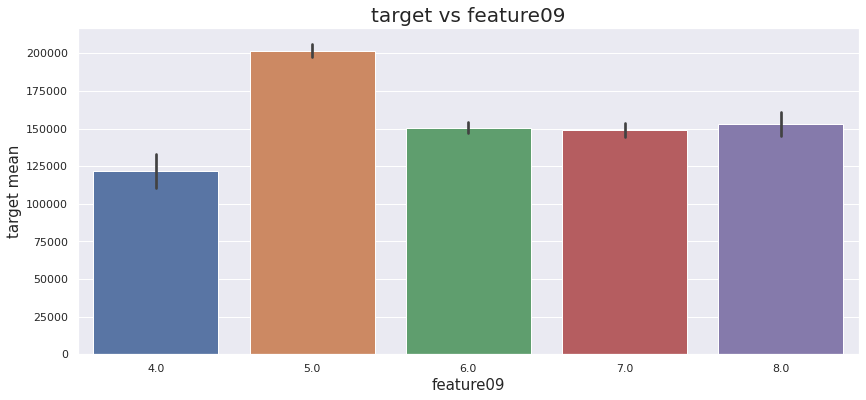

target (mean, std): (target, 179937.24747474748)
target quartiles (min, 25%, 50%, 75%, max): (40000.0, 132500.0, 163000.0, 213000.0, 591587.0)

*************************************************************************************************************


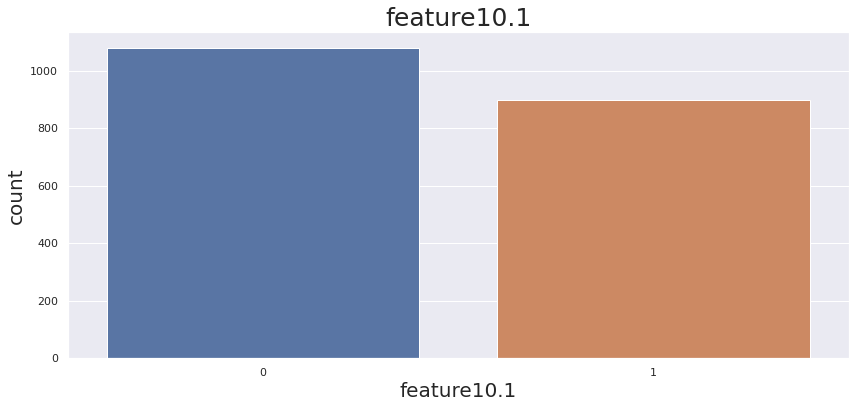

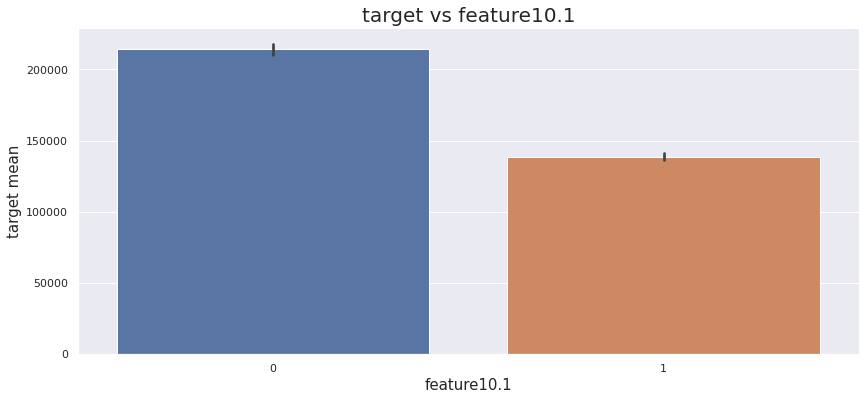

target (mean, std): (target, 179937.24747474748)
target quartiles (min, 25%, 50%, 75%, max): (40000.0, 132500.0, 163000.0, 213000.0, 591587.0)

*************************************************************************************************************


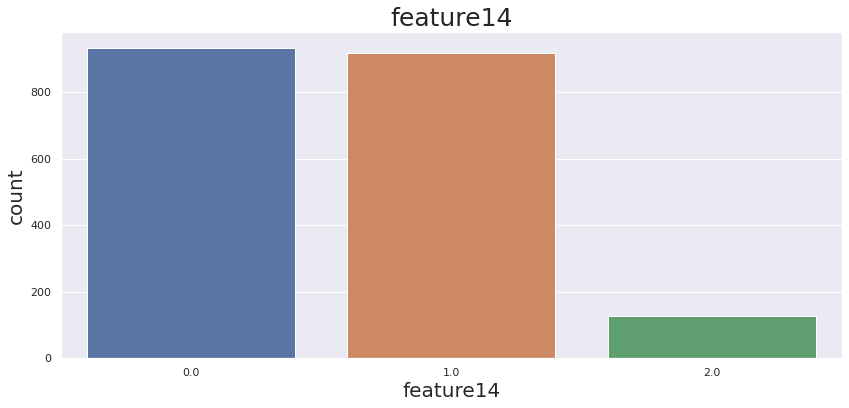

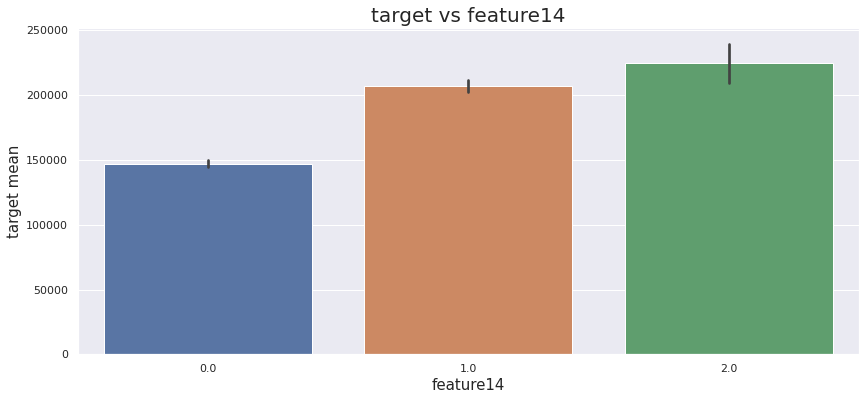

target (mean, std): (target, 179937.24747474748)
target quartiles (min, 25%, 50%, 75%, max): (40000.0, 132500.0, 163000.0, 213000.0, 591587.0)

*************************************************************************************************************


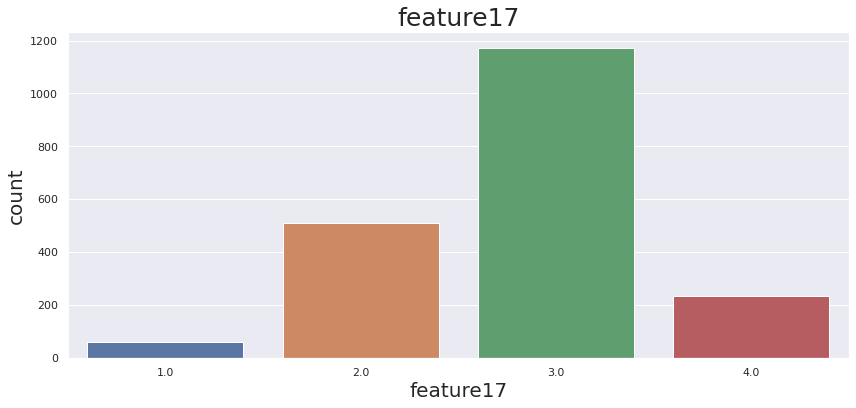

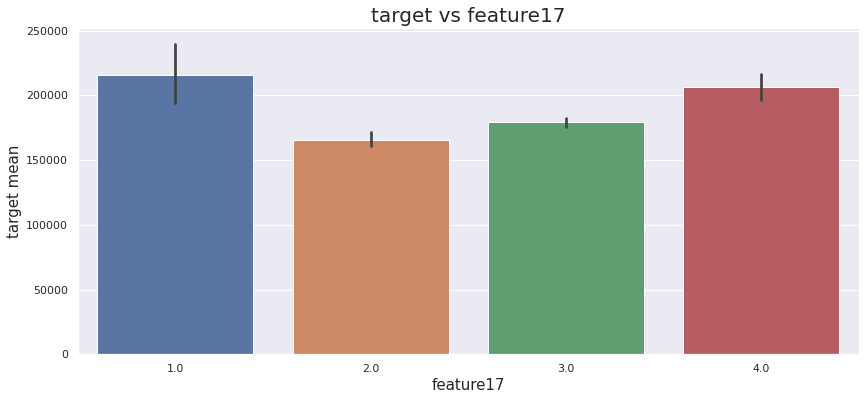

target (mean, std): (target, 179937.24747474748)
target quartiles (min, 25%, 50%, 75%, max): (40000.0, 132500.0, 163000.0, 213000.0, 591587.0)

*************************************************************************************************************


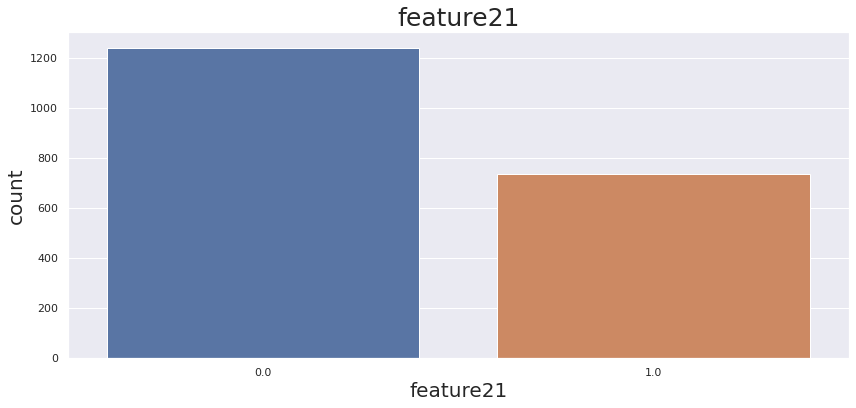

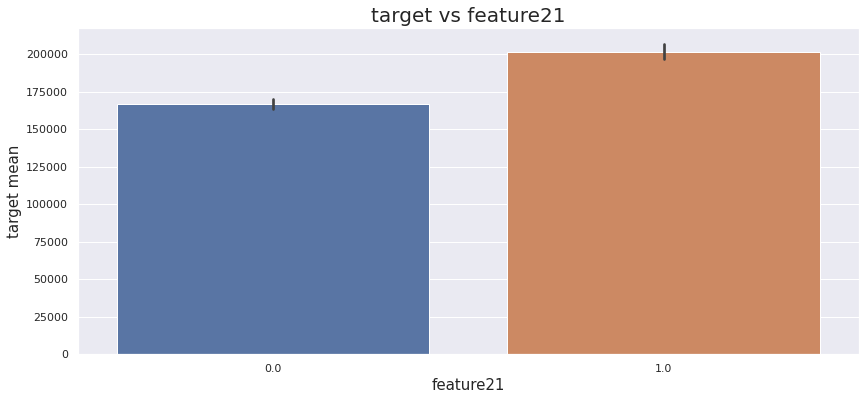

target (mean, std): (target, 179937.24747474748)
target quartiles (min, 25%, 50%, 75%, max): (40000.0, 132500.0, 163000.0, 213000.0, 591587.0)

*************************************************************************************************************


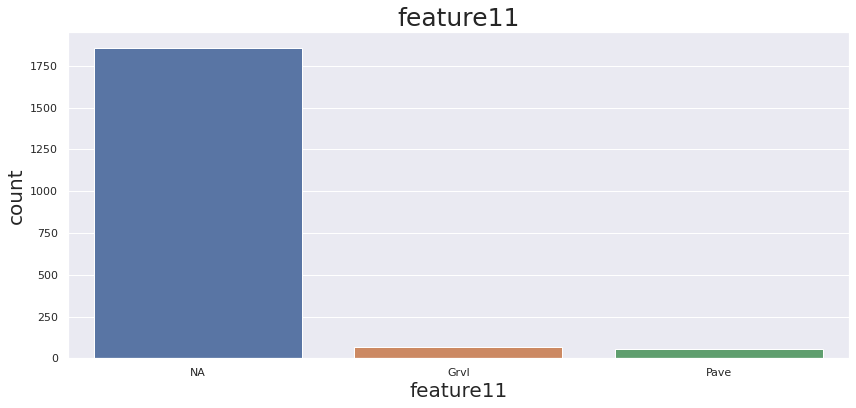

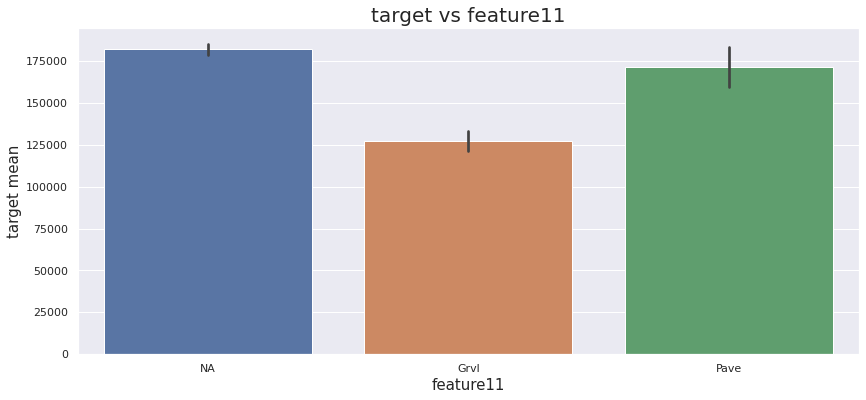

target (mean, std): (target, 179937.24747474748)
target quartiles (min, 25%, 50%, 75%, max): (40000.0, 132500.0, 163000.0, 213000.0, 591587.0)

*************************************************************************************************************


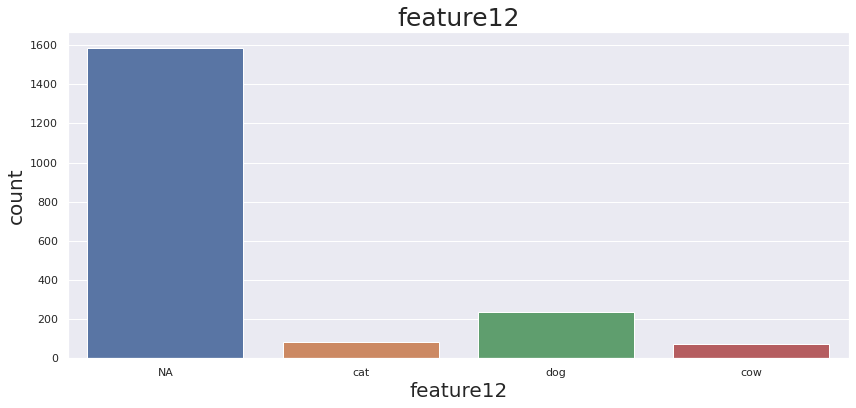

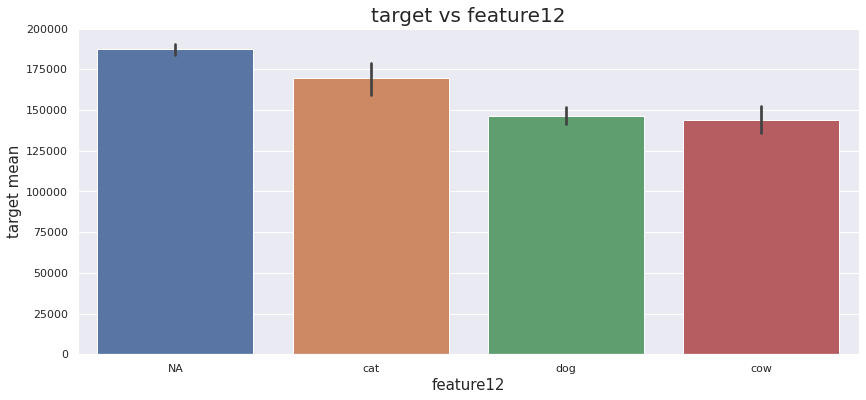

target (mean, std): (target, 179937.24747474748)
target quartiles (min, 25%, 50%, 75%, max): (40000.0, 132500.0, 163000.0, 213000.0, 591587.0)

*************************************************************************************************************


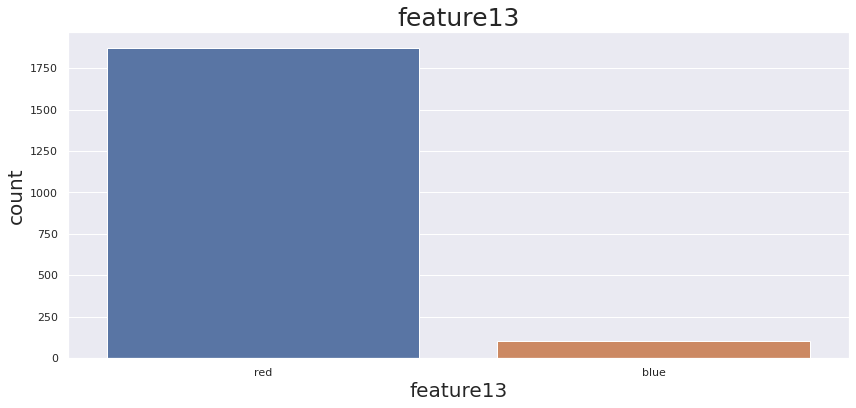

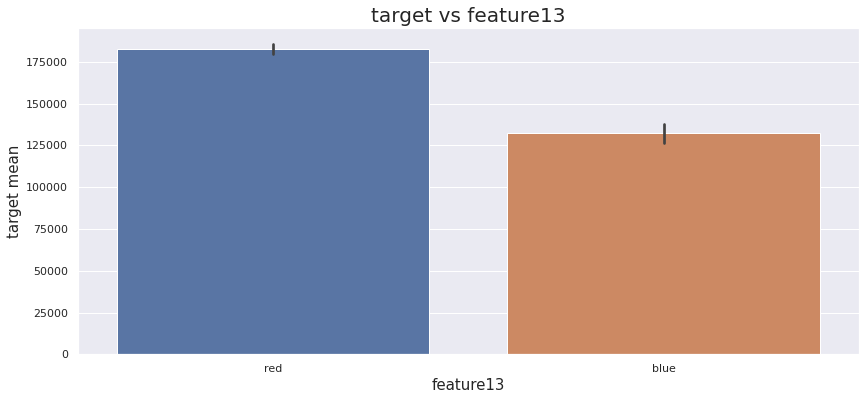

target (mean, std): (target, 179937.24747474748)
target quartiles (min, 25%, 50%, 75%, max): (40000.0, 132500.0, 163000.0, 213000.0, 591587.0)

*************************************************************************************************************


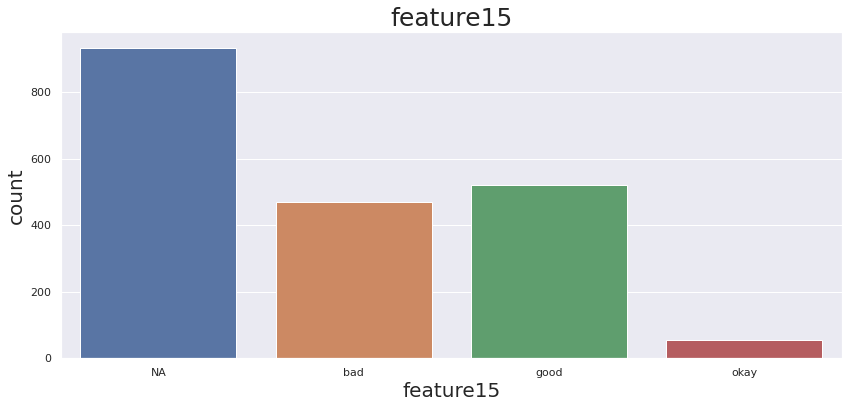

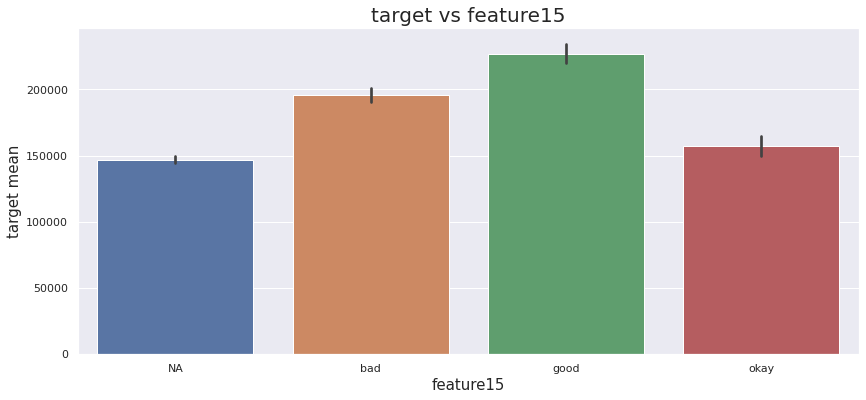

target (mean, std): (target, 179937.24747474748)
target quartiles (min, 25%, 50%, 75%, max): (40000.0, 132500.0, 163000.0, 213000.0, 591587.0)

*************************************************************************************************************


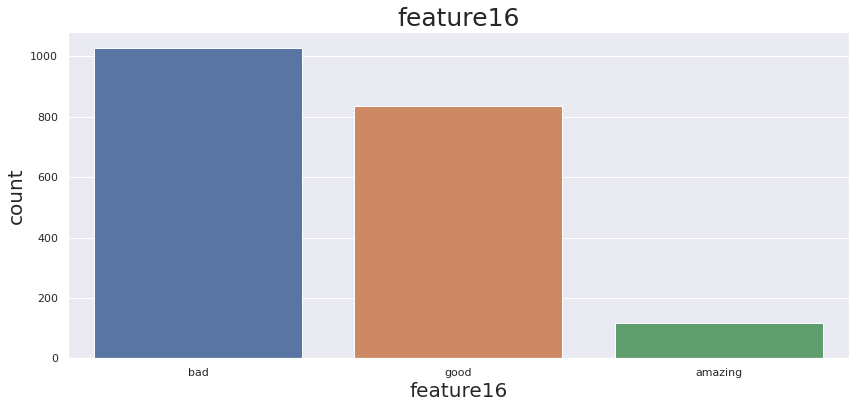

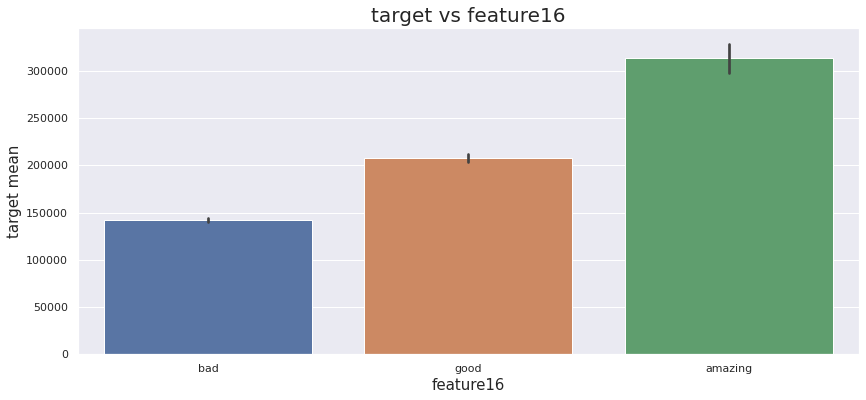

target (mean, std): (target, 179937.24747474748)
target quartiles (min, 25%, 50%, 75%, max): (40000.0, 132500.0, 163000.0, 213000.0, 591587.0)


In [59]:
print('Output 4.2')
ordinal_features = []
for feature in numeric_features:
    if (len(df[feature].unique()) < 20):
        ordinal_features.append(feature)
categorical_features = ordinal_features + nominal_features
for feature in categorical_features:
    print('\n*************************************************************************************************************')
    plt.figure(figsize=(14, 6))
    sns.countplot(x=feature, data=df)
    plt.title(feature, size=25)
    plt.xlabel(feature, size=20)
    plt.ylabel('count', size=20)
    plt.show()
    plt.figure(figsize=(14, 6))
    sns.barplot(x=feature, y=df['target'], data=df)
    plt.title('target vs {}'.format(feature), size=20)
    plt.ylabel('target mean', size=15)
    plt.xlabel(feature, size=15)
    plt.show()
    print('target (mean, std): ({}, {})'.format('target', df.target.describe()[1], df.target.describe()[2]))
    print('target quartiles (min, 25%, 50%, 75%, max): ({}, {}, {}, {}, {})'.format( 
                                  df.target.describe()[3], 
                                  df.target.describe()[4], 
                                  df.target.describe()[5], 
                                  df.target.describe()[6], 
                                  df.target.describe()[7]))    

# <center>5. Correlations</center>

#### Linear and rank-based correlations among significant variables are provided in form of a heatmap (Output 5.1). <br><br>The dataset suffers form features' collinearity. Also, given OneHotEncoding will be neccessary, dimentionality might be a problem. In order to address this issues, Principal Component Analysis (PCA) will need to be employed before the modelling phase. 

Output 5.1a (Pearson)


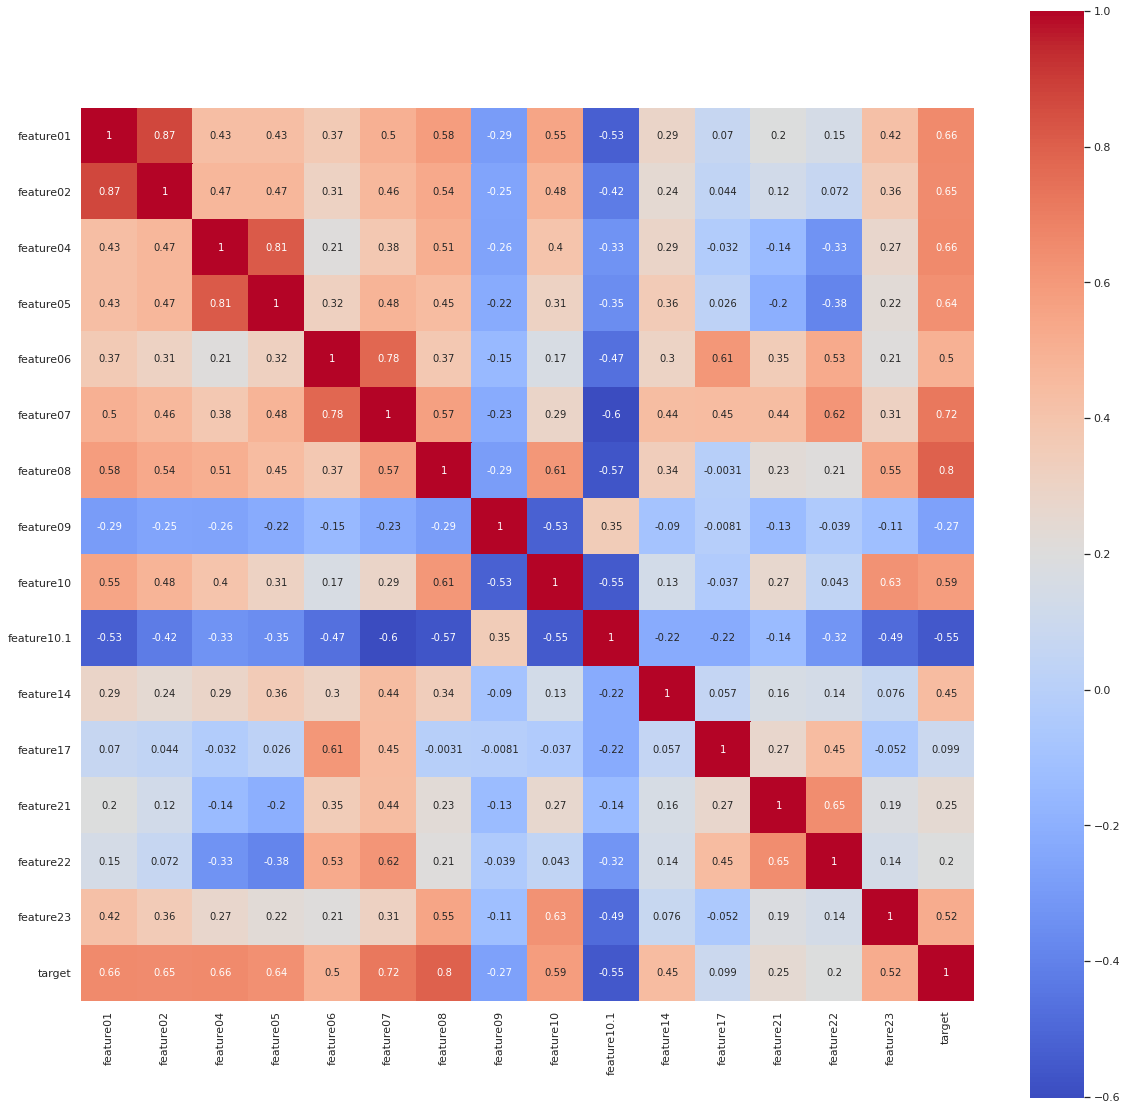

In [60]:
print('Output 5.1a (Pearson)')
numeric_features.append('target')
plt.figure(figsize=(20, 20))
sns.heatmap(df[numeric_features].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

Output 5.1b (Spearman)


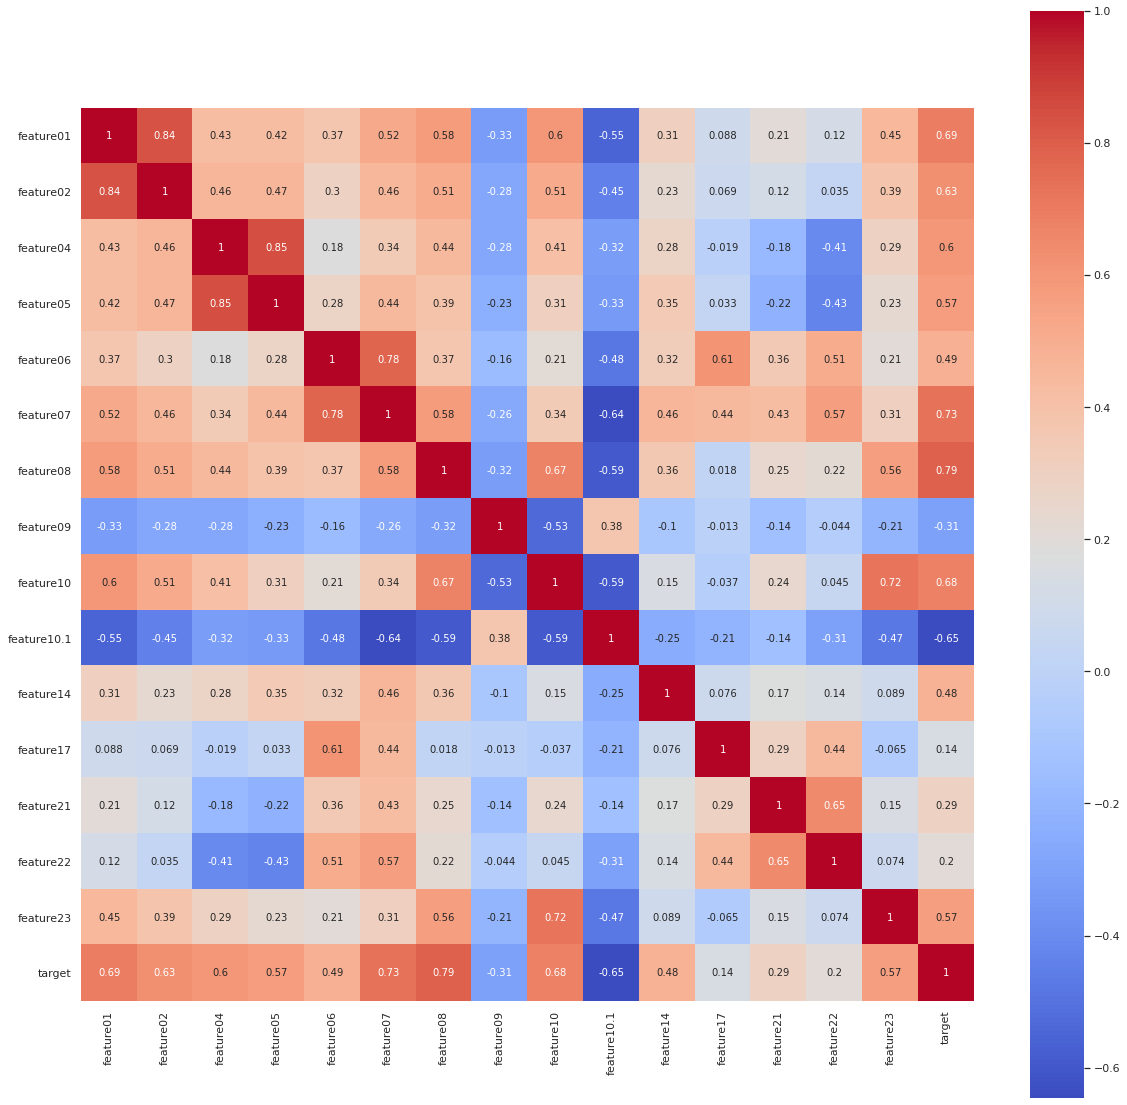

In [61]:
print('Output 5.1b (Spearman)')
plt.figure(figsize=(20, 20))
sns.heatmap(df[numeric_features].corr(method='spearman'), annot=True, square=True, cmap='coolwarm')
plt.show()

## <center>Multicollinearity</center>

#### Three features exhibit exceptionally strong collinearity are therefore excluded manualy (Output 5.2).

In [62]:
print('Output 5.2a\n')
numeric_features.remove('target')
temp_features = ['feature01', 'feature02']
for feature in temp_features:
    corr_sum = 0
    for col in numeric_features:
        if col == feature:
            continue
        corr_sum += abs(scipy.stats.pearsonr(df[feature], df[col])[0])
    print('{} corr with target: {}'.format(feature, scipy.stats.pearsonr(df[feature], df['target'])[0]))
    print('{} spearman corr vs target: {}'.format(feature, scipy.stats.spearmanr(df[[feature, 'target']])[0]))
    print('{} avg abs collinearity: {}\n'.format(feature, corr_sum/(len(numeric_features)-1)))

Output 5.2a

feature01 corr with target: 0.6598432540066279
feature01 spearman corr vs target: 0.6920069496782045
feature01 avg abs collinearity: 0.406072661674671

feature02 corr with target: 0.6503168127607262
feature02 spearman corr vs target: 0.6326793627503111
feature02 avg abs collinearity: 0.366191280922549



In [63]:
numeric_features.remove('feature02')

In [64]:
print('Output 5.2b\n')
temp_features = ['feature04', 'feature05']
for feature in temp_features:
    corr_sum = 0
    for col in numeric_features:
        if col == feature:
            continue
        corr_sum += abs(scipy.stats.pearsonr(df[feature], df[col])[0])
    print('{} corr with target: {}'.format(feature, scipy.stats.pearsonr(df[feature], df['target'])[0]))
    print('{} spearman corr vs target: {}'.format(feature, scipy.stats.spearmanr(df[[feature, 'target']])[0]))
    print('{} avg abs collinearity: {}\n'.format(feature, corr_sum/(len(numeric_features)-1)))

Output 5.2b

feature04 corr with target: 0.6599550225314891
feature04 spearman corr vs target: 0.5975656771235307
feature04 avg abs collinearity: 0.3380739868900546

feature05 corr with target: 0.6352390824221174
feature05 spearman corr vs target: 0.5717896236678642
feature05 avg abs collinearity: 0.352309854235637



In [65]:
numeric_features.remove('feature05')

In [66]:
print('Output 5.2c\n')
temp_features = ['feature06', 'feature07']
for feature in temp_features:
    corr_sum = 0
    for col in numeric_features:
        if col == feature:
            continue
        corr_sum += abs(scipy.stats.pearsonr(df[feature], df[col])[0])
    print('{} corr with target: {}'.format(feature, scipy.stats.pearsonr(df[feature], df['target'])[0]))
    print('{} spearman corr vs target: {}'.format(feature, scipy.stats.spearmanr(df[[feature, 'target']])[0]))
    print('{} avg abs collinearity: {}\n'.format(feature, corr_sum/(len(numeric_features)-1)))

Output 5.2c

feature06 corr with target: 0.49679738019102937
feature06 spearman corr vs target: 0.4919037273631148
feature06 avg abs collinearity: 0.3761354592341557

feature07 corr with target: 0.7217120833061136
feature07 spearman corr vs target: 0.7334673173731285
feature07 avg abs collinearity: 0.46709757043220185



In [67]:
numeric_features.remove('feature06')

# <center>6. Modelling</center>

Following estimators are GridSearched in effort to find the best suited model:
1. LinearRegression
2. GradientBoostingRegressor
3. SGDRegressor
4. ElasticNet

Next, training sample performance is examinated.

### <center>Dimentionality reduction</center>

#### Before we move further, dimentionality reduction might be worth considering, especially that dummy variables will be necessary. Right below however, PCA is applied on training data purely in order to inspect 'explained_variance_ratio_'. This action explicitly indicates, that 10 principal components will deliver at least 90% of prior variability (Output 6.1).

In [68]:
print('Output 6.1')
for feature in numeric_features:
    if (len(df[feature].unique())==2):
        nominal_features.append(feature)
        numeric_features.remove(feature)
features = numeric_features + nominal_features
X_train = X_train.loc[:, features]
X_test = X_test.loc[:, features]

df = pd.get_dummies(X_train, columns=nominal_features, drop_first=True)
for col in numeric_features:
    df[col] = df[col].apply(lambda x: (x-df[col].mean())/df[col].std())

pca = PCA(n_components=18, svd_solver='full')
pca.fit(df)

explained_variance_ratio = 0
components=0
while explained_variance_ratio<0.9:
    explained_variance_ratio += pca.explained_variance_ratio_[components]
    components += 1
print('Suggested number of principal components: {}'.format(components + 1))

Output 6.1
Suggested number of principal components: 10


### <center>Training</center>

#### The setup is as follows: numeric data is preprocessed with StandardScaler while nominal data is OneHotEncoded before the PCA takes place. Estimators are then GridSearched; adopted hyperparameters grid is shown in (Output 6.2).

In [69]:
# Output 6.2
prep = make_column_transformer((StandardScaler(), numeric_features),
                               (OneHotEncoder(drop='first'), nominal_features))
pipelines = {
    'linreg':make_pipeline(prep, PCA(n_components=10, svd_solver='full'), LinearRegression()),
    'gbr':make_pipeline(prep, PCA(n_components=10, svd_solver='full'), GradientBoostingRegressor(random_state=666)),
    'sgd':make_pipeline(prep, PCA(n_components=10, svd_solver='full'), SGDRegressor(random_state=666)),
    'enet':make_pipeline(prep, PCA(n_components=10, svd_solver='full'), ElasticNet(random_state=666))
}

hypergrid = {
    'linreg': {
        'linearregression__fit_intercept':[True, False]
    },
    'gbr': {
        'gradientboostingregressor__learning_rate':[0.001, 0.01, 0.1, 0.2, 0.5],
        'gradientboostingregressor__warm_start':[True, False]
        
    },
    'sgd': {
        'sgdregressor__alpha':[0.0001, 0.001, 0.01],
        'sgdregressor__warm_start':[True, False]
    },
    'enet': {
        'elasticnet__alpha':[33, 66, 100, 133, 166],
        'elasticnet__warm_start':[True, False],
        'elasticnet__l1_ratio':[0.001, 0.1, 0.2, 0.5, 0.66, 0.83, 0.999]
    },
}

#### Training is processed (Output 6.3).

In [70]:
print('Output 6.3')
fit_models_r2 = {}
fit_models_mae = {}
for algo, pipeline in pipelines.items():
    model_r2 = GridSearchCV(pipeline, hypergrid[algo], cv=10, scoring='r2')
    model_mae = GridSearchCV(pipeline, hypergrid[algo], cv=10, scoring='neg_mean_absolute_error')
    print('Starting training for {}.'.format(algo))
    model_r2.fit(X_train,y_train)
    model_mae.fit(X_train,y_train)
    fit_models_r2[algo] = model_r2
    fit_models_mae[algo] = model_mae
    print('{} has been successfully fit.'.format(algo))

Output 6.3
Starting training for linreg.
linreg has been successfully fit.
Starting training for gbr.
gbr has been successfully fit.
Starting training for sgd.
sgd has been successfully fit.
Starting training for enet.
enet has been successfully fit.


#### Training performance is summarized in (Output 6.4)

In [71]:
print('Output 6.4')
r2_train_results= {}
mae_train_results= {}

for algo in fit_models_r2.keys():
    r2_train_results[algo] = round(fit_models_r2[algo].best_score_, 5)
    mae_train_results[algo] = abs(round(fit_models_mae[algo].best_score_ , 5))

r2_train_results = pd.Series(r2_train_results)
mae_train_results = pd.Series(mae_train_results)

train_results = pd.DataFrame(columns = ['R2', 'MAE'])
train_results['R2'] = r2_train_results
train_results['MAE'] = mae_train_results
print(train_results.sort_values(by='R2', ascending=False))

Output 6.4
             R2          MAE
gbr     0.88057  16240.06297
linreg  0.83303  20403.36966
enet    0.83302  20134.06390
sgd     0.83280  20314.66591


# <center>7. Model Evaluation</center>

In this section, estimators performance is evaluated on out-of-sample data. Metrics like determination coeff (R2) and mean absolute error (MAE) are calculated.

#### Prediction performance is summarized in (Output 7.1).

In [72]:
print('Output 7.1')
r2_test_results= {}
mae_test_results= {}

for algo in fit_models_r2.keys():
    y_pred_r2 = fit_models_r2[algo].predict(X_test)
    y_pred_mae = fit_models_mae[algo].predict(X_test)
    r2_test_results[algo] = round(r2_score(y_test, y_pred_r2), 5)
    mae_test_results[algo] = abs(round(mean_absolute_error(y_test, y_pred_mae), 5))

r2_test_results = pd.Series(r2_test_results)
mae_test_results = pd.Series(mae_test_results)

test_results = pd.DataFrame(columns = ['R2', 'MAE'])
test_results['R2'] = r2_test_results
test_results['MAE'] = mae_test_results
print(test_results.sort_values(by='R2', ascending=False))

Output 7.1
             R2          MAE
gbr     0.87513  17386.16431
linreg  0.83732  21098.33917
enet    0.83685  20976.93414
sgd     0.83564  21605.90262


#### The best performing estimator for this data is GradientBoostingRegressor (Output 7.2).

In [73]:
print('Output 7.2\n')
print('GradientBoostingRegressor best params:\n {}'.format(fit_models_r2['gbr'].best_params_))

Output 7.2

GradientBoostingRegressor best params:
 {'gradientboostingregressor__learning_rate': 0.1, 'gradientboostingregressor__warm_start': True}
